In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor

In [11]:
image = "/content/raca-de-cachorro-preto-e-branco-1280x720.jpg"

# Atividade 01

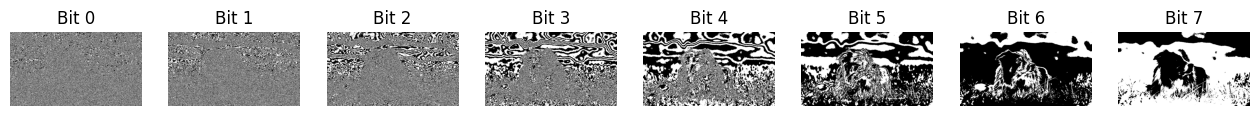

In [12]:
def bit_plane_slicing(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Não foi possível carregar a imagem. Verifique o caminho.")

    bit_planes = []
    for i in range(8):
        bit_plane = (img & (1 << i)) >> i
        bit_planes.append(bit_plane * 255)

    return bit_planes

def show_bit_planes(bit_planes):
    fig, axes = plt.subplots(1, 8, figsize=(16, 2))
    for i, plane in enumerate(bit_planes):
        axes[i].imshow(plane, cmap='gray')
        axes[i].set_title(f'Bit {i}')
        axes[i].axis('off')
    plt.show()

bit_planes = bit_plane_slicing(image)
show_bit_planes(bit_planes)

# atividade 03

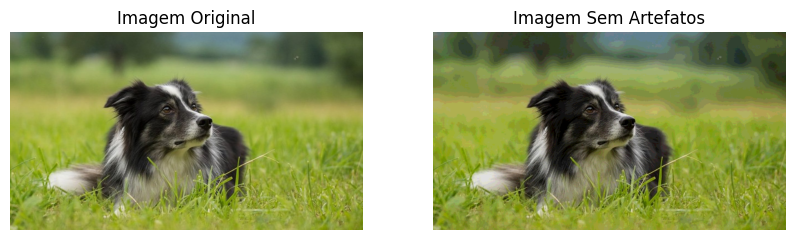

In [13]:
def remove_artifacts_color(image_path, significant_bits=4):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Não foi possível carregar a imagem. Verifique o caminho.")

    reconstructed_img = np.zeros_like(img, dtype=np.uint8)
    for i in range(significant_bits, 8):
        reconstructed_img += (img & (1 << i))

    return reconstructed_img

def show_images(original, cleaned):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Imagem Original')
    axes[0].axis('off')

    axes[1].imshow(cv2.cvtColor(cleaned, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Imagem Sem Artefatos')
    axes[1].axis('off')

    plt.show()

# Exemplo de uso
original_img = cv2.imread(image)
cleaned_img = remove_artifacts_color(image)
show_images(original_img, cleaned_img)


In [14]:
def slice_bits(pixel, bit_position):
    return (pixel >> bit_position) & 1

def slice_image_block(block, bit_position):
    return np.vectorize(lambda pixel: slice_bits(pixel, bit_position))(block)

def slice_image(image, bit_position, num_workers=4):
    num_rows = image.shape[0]

    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        futures = []
        for i in range(num_workers):
            start_row = i * (num_rows // num_workers)
            end_row = (i + 1) * (num_rows // num_workers) if i != num_workers - 1 else num_rows
            futures.append(executor.submit(slice_image_block, image[start_row:end_row], bit_position))

        result = []
        for future in futures:
            result.append(future.result())

        return np.vstack(result)

image1 = np.random.randint(0, 256, size=(10, 10), dtype=np.uint8)

bit_position = 3
sliced_image = slice_image(image1, bit_position)

image1, sliced_image


(array([[215,  65, 115, 241,  53, 103, 159, 164, 108,  77],
        [204,  35,  31, 161, 134, 218, 158, 180, 208, 172],
        [114, 169, 111, 153, 199, 162, 126, 176, 126, 129],
        [ 52, 158,  40,   9, 213,  82, 129, 254, 186, 230],
        [ 71,  50,  35,   9,   6, 233, 190, 164, 201,   4],
        [219, 235,  33, 197, 119, 127,  33,  47, 249,  56],
        [182, 202, 135,  96,  28, 148, 179, 188, 214, 249],
        [ 47, 230, 112, 207,  48,  69, 204,  62,  86, 190],
        [239, 104, 235, 131, 131,  55,  44, 251, 201, 213],
        [196, 238, 161,  23, 155, 245, 162,  65,   9,  48]], dtype=uint8),
 array([[0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
        [0, 1, 1, 1, 0, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 0, 0, 0, 1, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 0, 1, 0],
        [1, 1, 0, 0, 0, 1, 0, 1, 1, 1],
        [0, 1, 0, 0, 1, 0, 0, 1, 0, 1],
        [1, 0, 0, 1, 0, 0, 1, 1, 0, 1],
        [1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
        [0, 1, 0, 0, 1, 0